# Proyecto de Aprendizaje Automático


El proyecto tiene como objetivo desarrollar un modelo preciso que estime el precio de una vivienda utilizando datos de Airbnb, cubriendo la preparación, análisis exploratorio, preprocesamiento, modelado y conclusiones en un enfoque de regresión.

### Tratamiento de datos

In [130]:
import pandas as pd

# Cargar los datos de Airbnb
airbnb = pd.read_csv('data/airbnb-listings-extract.csv', sep=';')

# Cargamos fichero csv y almacenamos en pandas df
airbnb = pd.read_csv(r'data/airbnb-listings-extract.csv', sep=';')


Tras cargar el dataset y antes de dividirlo en conjuntos de entrenamiento y prueba, se visualiza una muestra de los datos y su estructura general para identificar la variable dependiente (objetivo) y las independientes. Si es necesario, eliminamos variables sin información relevante o filas con valores faltantes en la variable dependiente.

In [131]:
airbnb.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."
8,15698621,https://www.airbnb.com/rooms/15698621,20170407214050,2017-04-08,98. Enamorats,"Unique apartment in vibrant neighborhoods, car...",Fantastic apartment located 7 minutes from the...,"Unique apartment in vibrant neighborhoods

In [132]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [133]:
# Variables irrelevantes para el análisis
del_columns = [
    'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 
    'Host URL', 'Host Name', 'Host Since', 'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 
    'Host Picture Url', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 
    'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'License', 'Jurisdiction Names'
]



Las variables irrelevantes se eliminaron principalmente por contener URLs, descripciones no útiles para un análisis objetivo, ID's secundarios, fechas relacionadas con la extracción de datos, información del anfitrión, direcciones (excepto latitud y longitud), fechas de reseñas, valores faltantes, precios agregados altamente correlacionados y datos sobre licencias o jurisdicciones.

In [134]:
# Eliminar columnas irrelevantes
airbnb_col_fil = airbnb.drop(columns=del_columns)


In [135]:
# Comparar las dimensiones antes y después de eliminar las columnas
print(f"Primer df: {airbnb.shape}\nSegundo df: {airbnb_col_fil.shape} - Reducción de 46 columnas")


Primer df: (14780, 89)
Segundo df: (14780, 43) - Reducción de 46 columnas



Para evitar que las muestras de entrenamiento y prueba contengan observaciones con valores nulos en la variable dependiente, filtramos el dataframe, ya que los métodos que emplearemos requieren etiquetas completas para calcular el error de manera adecuada.

In [136]:
# Filtrar filas con valores nulos en la variable 'Price'
airbnb_row_fil = airbnb_col_fil.dropna(subset=['Price'])


In [137]:
# Comparar las dimensiones antes y después de eliminar filas sin precio
print(f"Primer df: {airbnb_col_fil.shape}\nSegundo df: {airbnb_row_fil.shape} - Eliminadas 7 filas sin Precio")


Primer df: (14780, 43)
Segundo df: (14763, 43) - Eliminadas 7 filas sin Precio


In [138]:
from sklearn.model_selection import train_test_split

# Séparation en train et test (70-30)
train, test = train_test_split(airbnb_row_fil, test_size=0.3, random_state=420)

# Afficher les dimensions et proportions
print(f'Dimensiones del dataset de training: {train.shape}, proporción: {train.shape[0]/airbnb_row_fil.shape[0]*100:.0f}%')
print(f'Dimensiones del dataset de test: {test.shape}, proporción: {test.shape[0]/airbnb_row_fil.shape[0]*100:.0f}%')

# Sauvegarder les fichiers
train.to_csv('data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('data/airbnb_test.csv', sep=';', decimal='.', index=False)


Dimensiones del dataset de training: (10334, 43), proporción: 70%
Dimensiones del dataset de test: (4429, 43), proporción: 30%


#### "Análisis Descriptivo"


El análisis exploratorio tiene como objetivo depurar y limpiar los datos, además de entender su distribución y características para elegir el modelo más adecuado.

In [139]:
train.describe()

,ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.033400e+04,9012.000000,10332.000000,10332.000000,10334.000000,10334.000000,10334.000000,10300.000000,10318.000000,10307.000000,...,10334.000000,8037.000000,8020.000000,8024.000000,8011.000000,8025.000000,8009.000000,8008.000000,10331.000000,8148.000000
mean,1.028419e+07,94.963160,12.445993,12.445993,40.505776,-3.910722,3.296787,1.285485,1.350746,2.061415,...,22.705825,91.769192,9.423940,9.338360,9.626514,9.648100,9.549757,9.225400,9.489110,1.864948
std,5.559048e+06,14.825346,33.849160,33.849160,4.495461,14.015642,2.109615,0.661582,0.908195,1.631491,...,38.366503,8.886800,0.910553,0.968039,0.789011,0.762748,0.763525,0.939546,23.598028,1.868944
min,1.862800e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.615668e+06,100.000000,1.000000,1.000000,40.409917,-3.707628,2.000000,1.000000,1.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.136236e+07,100.000000,2.000000,2.000000,40.419722,-3.700665,3.000000,1.000000,1.000000,2.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.531121e+07,100.000000,6.000000,6.000000,40.430972,-3.683676,4.000000,1.000000,2.000000,2.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.740000
max,1.858361e+07,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [140]:
train.isnull().any()

ID                                False
Host Location                      True
Host Response Time                 True
Host Response Rate                 True
Host Neighbourhood                 True
Host Listings Count                True
Host Total Listings Count          True
Neighbourhood Cleansed            False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                             False
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False



Con solo estas dos instrucciones, notamos que aún hay muchas variables (el output puede abrirse en un editor de texto, pero en el log se trunca). Lo ideal, y como procederemos, es analizar las variables en grupos homogéneos, comparándolas entre ellas y con la variable dependiente.

In [141]:
# Variables relacionadas con el Host
val_host = ['Host Location', 'Host Response Time', 'Host Response Rate', 'Host Neighbourhood', 
            'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
print(len(val_host))

# Variables relacionadas con la dirección
val_dir = ['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Geolocation']
print(len(val_dir))

# Variables relacionadas con características físicas del Airbnb
val_air = ['Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 
           'Bed Type', 'Amenities', 'Square Feet']
print(len(val_air))

# Variables relacionadas con condiciones de alquiler del Airbnb
val_rent = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 
            'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 
            'Cancellation Policy', 'Features']
print(len(val_rent))

# Variables relacionadas con las reseñas
val_res = ['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
           'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
           'Reviews per Month']
print(len(val_res))


7
4
9
12
9


In [142]:
# Verificar que todas las columnas estén incluidas en el estudio
listas_comprobacion = val_host + val_dir + val_air + val_rent + val_res

# Comprobar si todas las columnas del conjunto de entrenamiento están en la lista de variables
for col in train.columns:
    if col not in listas_comprobacion:
        print(f"Falta incluir: {col}")


Falta incluir: ID
Falta incluir: Price


In [143]:
# Verificar si el número de columnas en el conjunto de entrenamiento coincide con la suma de las variables esperadas
expected_columns = 2 + len(val_host) + len(val_dir) + len(val_air) + len(val_rent) + len(val_res)

if len(train.columns) == expected_columns:
    print("El número de columnas es correcto.")
else:
    print(f"Discrepancia en el número de columnas: {len(train.columns)} en lugar de {expected_columns}")



El número de columnas es correcto.


In [144]:
import numpy as np
import pandas as pd

def custom_descibre(df):
    # Sélectionner uniquement les colonnes numériques
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calcul des statistiques
    stats_df = pd.DataFrame({
        'count': numeric_df.count(),
        'mean': numeric_df.mean(),
        'std': numeric_df.std(),
        'min': numeric_df.min(),
        '25%': numeric_df.quantile(0.25),
        '50%': numeric_df.median(),
        '75%': numeric_df.quantile(0.75),
        'max': numeric_df.max(),
        'nulls': numeric_df.isnull().sum(),
        'Corr': numeric_df.corrwith(numeric_df.iloc[:, 0])  # Corrélation avec la première colonne
    })
    
    return stats_df


#### Host

In [145]:
train[['Price'] + val_host].head()

,Price,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Calculated host listings count
13748,45.0,"Madrid, Community of Madrid, Spain",within a few hours,100.0,La Latina,1.0,1.0,1.0
9656,76.0,"Palma, Balearic Islands, Spain",within an hour,100.0,NaN,4.0,4.0,3.0
1379,50.0,"Madrid, Madrid, Spain",within an hour,100.0,Malasaña,11.0,11.0,11.0
11537,23.0,"Madrid, Community of Madrid, Spain",NaN,NaN,NaN,1.0,1.0,1.0
8021,56.0,"Madrid, Community of Madrid, Spain",within an hour,100.0,Embajadores,1.0,1.0,1.0


In [146]:
custom_descibre(train[['Price'] + val_host])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Host Response Rate,9012,94.963160,14.825346,0.0,100.0,100.0,100.0,100.0,1322,0.011738
Host Listings Count,10332,12.445993,33.849160,0.0,1.0,2.0,6.0,519.0,2,0.236560
Host Total Listings Count,10332,12.445993,33.849160,0.0,1.0,2.0,6.0,519.0,2,0.236560
Calculated host listings count,10331,9.489110,23.598028,1.0,1.0,2.0,5.0,145.0,3,0.234203


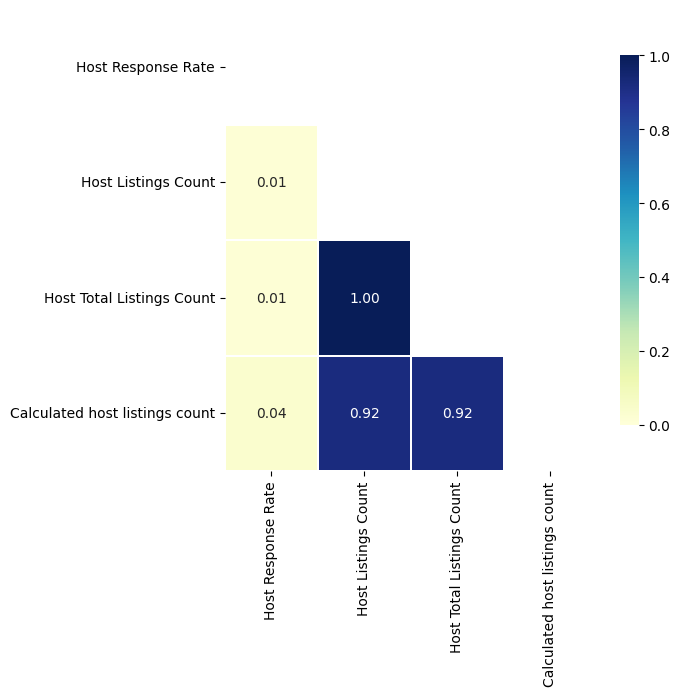

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de corrélation, excluant certaines variables
corr = np.abs(train[val_host].drop(['Host Location', 'Host Response Time', 'Host Neighbourhood'], axis=1).corr())

# Masque pour ne pas afficher la moitié supérieure de la matrice (corrélations redondantes)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la taille de la figure
plt.figure(figsize=(6, 6))

# Dessiner la heatmap avec le masque et l'échelle appropriée
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5, cmap="YlGnBu",
            annot=True, fmt=".2f", linewidths=.1, cbar_kws={"shrink": .8})

# Afficher la heatmap
plt.show()


In [148]:
# Compter le nombre d'occurrences de 'ID' par catégorie de 'Host Response Time'
train[['ID'] + val_host][['ID', 'Host Response Time']] \
    .groupby('Host Response Time', dropna=False).count()


,ID
Host Response Time,
a few days or more,201
within a day,1245
within a few hours,2013
within an hour,5553
NaN,1322


concluimos que variables como Host Location y Host Neighbourhood pueden eliminarse, ya que no aportan información relevante, siendo solo cadenas de texto. Host Response Time tiene muchos valores nulos y no muestra correlación significativa con el precio, por lo que también debe eliminarse. Host Response Rate puede ser transformada en variable discreta mediante codificación. Aunque Host Listings Count podría ser interesante, su alta media y la presencia de valores atípicos distorsionan el análisis; se observa que el 75% de los hosts tienen 6 o menos propiedades. Por su parte, Host Total Listings Count es casi idéntica a la anterior y puede eliminarse. Finalmente, Calculated Host Listings Count, que es una versión corregida de la variable anterior sin los valores atípicos, será la que utilizaremos.


#### la dirección

In [149]:
train[['Price'] + val_dir].head()

,Price,Neighbourhood Cleansed,Latitude,Longitude,Geolocation
13748,45.0,Embajadores,40.406915,-3.705853,"40.4069146026,-3.70585340101"
9656,76.0,Palma de Mallorca,39.572762,2.647736,"39.5727620344,2.6477358056"
1379,50.0,Embajadores,40.407502,-3.699373,"40.4075017006,-3.69937311056"
11537,23.0,Acacias,40.396398,-3.706252,"40.3963977918,-3.70625235516"
8021,56.0,Embajadores,40.408940,-3.698995,"40.4089401144,-3.69899515645"


In [150]:
# Compter le nombre d'occurrences de 'ID' pour chaque 'Neighbourhood Cleansed'
train[['ID'] + val_dir][['ID', 'Neighbourhood Cleansed']] \
    .groupby('Neighbourhood Cleansed', dropna=False).count()


,ID
Neighbourhood Cleansed,
78704,2
78733,1
Abrantes,10
Acacias,104
Adams,1
...,...
sterbro,2
südliche Luisenstadt,1
Élysée,5


In [151]:
# Compter les valeurs manquantes dans 'Neighbourhood Cleansed'
train[val_dir][['Neighbourhood Cleansed']].isnull().sum()


Neighbourhood Cleansed    0
dtype: int64


Tras el análisis exploratorio, observamos que la mayoría de los Airbnb están ubicados en España. Además, la localización de un Airbnb es un factor clave que influye en su precio. Por lo tanto, Neighbourhood Cleansed es una variable de tipo string que debería ser codificada, pero decidimos descartarla por ahora. En cambio, mantenemos Latitude y Longitude en el estudio, ya que son relevantes para determinar el precio del Airbnb, ya que su ubicación geográfica influye en él. Por último, Geolocation, que es la concatenación de latitud y longitud, se elimina, ya que ambas variables ya están incluidas por separado.

#### características físicas del Airbnb

In [152]:
train[['Price'] + val_air].head()

,Price,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet
13748,45.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN
9656,76.0,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN
1379,50.0,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,P...",NaN
11537,23.0,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Wheelchair acces...",NaN
8021,56.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Breakfas...",NaN


In [153]:
custom_descibre(train[['Price'] + val_air])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Accommodates,10334,3.296787,2.109615,1.0,2.0,3.0,4.0,16.0,0,0.527395
Bathrooms,10300,1.285485,0.661582,0.0,1.0,1.0,1.0,8.0,34,0.381447
Bedrooms,10318,1.350746,0.908195,0.0,1.0,1.0,2.0,10.0,16,0.502090
Beds,10307,2.061415,1.631491,1.0,1.0,2.0,2.0,16.0,27,0.446070
Square Feet,408,403.678922,681.306118,0.0,0.0,98.5,646.0,6997.0,9926,0.430681


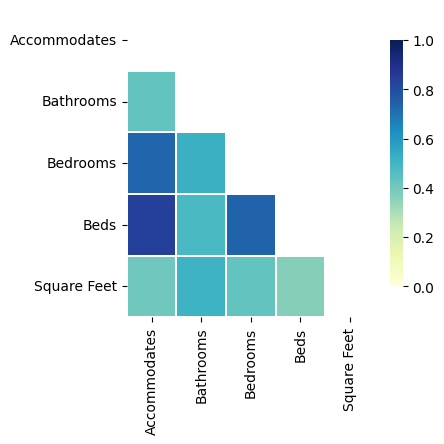

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr = np.abs(train[val_air].drop(['Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1).corr())

# Créer un masque pour la partie supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la figure de matplotlib
plt.figure(figsize=(4, 4))

# Dessiner la heatmap avec le masque et l'échelle de couleur correcte
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5, 
            linewidths=0.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})

plt.show()


In [155]:
# Compter le nombre d'occurrences de 'ID' pour chaque 'Property Type'
train[['ID'] + val_air][['ID', 'Property Type']] \
    .groupby('Property Type', dropna=False).count()


,ID
Property Type,
Apartment,8370
Bed & Breakfast,252
Boat,3
Boutique hotel,4
Bungalow,1
Camper/RV,3
Casa particular,1
Chalet,16
Condominium,252


In [156]:
train[['ID']+ val_air][['ID', 'Room Type']].groupby('Room Type', dropna = False).count()

,ID
Room Type,
Entire home/apt,6329
Private room,3872
Shared room,133


In [157]:
train[['ID']+ val_air][['ID', 'Bed Type']].groupby('Bed Type', dropna = False).count()

,ID
Bed Type,
Airbed,4
Couch,16
Futon,32
Pull-out Sofa,182
Real Bed,10100


In [158]:
# Compter le nombre d'occurrences de 'ID' pour chaque 'Amenities'
train[['ID'] + val_air][['ID', 'Amenities']] \
    .groupby('Amenities', dropna=False).count()


,ID
Amenities,
"Air conditioning,Breakfast,Washer,Essentials,Hair dryer",1
"Air conditioning,Elevator in building,Heating,Family/kid friendly,First aid kit,Essentials,Hangers,translation missing: en.hosting_amenity_50",1
"Air conditioning,Heating,Essentials,translation missing: en.hosting_amenity_50",1
"Air conditioning,Heating,First aid kit,Essentials,Shampoo,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",1
"Air conditioning,Kitchen,Breakfast,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo",1
...,...
"Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",3
translation missing: en.hosting_amenity_49,1
"translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",25


In [159]:
# Extraire les valeurs uniques d' 'Amenities' et compter leur fréquence
amenities_count = train[val_air]['Amenities'].str.split(',').explode().value_counts()

# Afficher les résultats
amenities_count



Amenities
Wireless Internet    9695
Kitchen              9510
Heating              9292
Essentials           8877
Washer               8774
                     ... 
Refrigerator            1
Coffee maker            1
Microwave               1
Fireplace guards        1
Pets Allowed            1
Name: count, Length: 98, dtype: int64


Tras revisar los primeros estadísticos, se concluye que variables como Property Type y Room Type deben ser codificadas, ya que son de tipo string y la mayoría de las observaciones corresponden a apartamentos y apartamentos completos, respectivamente. Accommodates es una variable numérica sin valores nulos, relevante para el estudio del precio, al igual que Bathrooms, Bedrooms y Beds, que también son numéricas y se mantienen como variables de interés, aunque se debe investigar la razón de los Airbnb con 0 baños. Bed Type es otra variable categórica útil, que también será codificada. Amenities, aunque contiene una lista de comodidades, se descarta en el análisis inicial debido a la complejidad, aunque podría ser útil crear variables dicotómicas o booleanas en el futuro. Finalmente, Square Feet, a pesar de ser una variable numérica, tiene demasiados valores nulos y se descarta por su bajo porcentaje de información completa.

####  condiciones de alquiler del Airbnb

In [160]:
train[['Price'] + val_rent].head()

,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Features
13748,45.0,NaN,20.0,1,0,2,1125,4,10,34,309,moderate,"Host Is Superhost,Host Has Profile Pic,Host Id..."
9656,76.0,NaN,NaN,1,0,3,1125,6,15,30,201,strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1379,50.0,150.0,20.0,2,10,1,1125,12,38,61,231,strict,"Host Has Profile Pic,Requires License,Instant ..."
11537,23.0,NaN,NaN,1,0,2,1125,0,0,0,0,flexible,"Host Has Profile Pic,Requires License,Instant ..."
8021,56.0,150.0,20.0,1,0,1,1125,1,3,8,80,moderate,"Host Has Profile Pic,Is Location Exact,Require..."


In [161]:
custom_descibre(train[['Price'] + val_rent])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.0,35.0,56.0,89.0,969.0,0,1.000000
Security Deposit,4413,188.573759,113.537267,0.0,100.0,150.0,200.0,990.0,5921,0.394731
Cleaning Fee,6153,31.497156,28.407071,0.0,15.0,25.0,40.0,500.0,4181,0.668850
Guests Included,10334,1.597736,1.181521,0.0,1.0,1.0,2.0,16.0,0,0.297826
Extra People,10334,7.582059,11.141671,0.0,0.0,0.0,15.0,276.0,0,0.108904
Minimum Nights,10334,3.069286,13.780012,1.0,1.0,2.0,3.0,1125.0,0,0.021856
Maximum Nights,10334,978.886104,10034.667728,1.0,365.0,1125.0,1125.0,1000000.0,0,0.000203
Availability 30,10334,8.924037,9.250733,0.0,0.0,6.0,14.0,30.0,0,0.112239
Availability 60,10334,23.023611,19.606504,0.0,5.0,20.0,38.0,60.0,0,0.073399
Availability 90,10334,39.915231,29.476726,0.0,12.0,38.0,65.0,90.0,0,0.040618


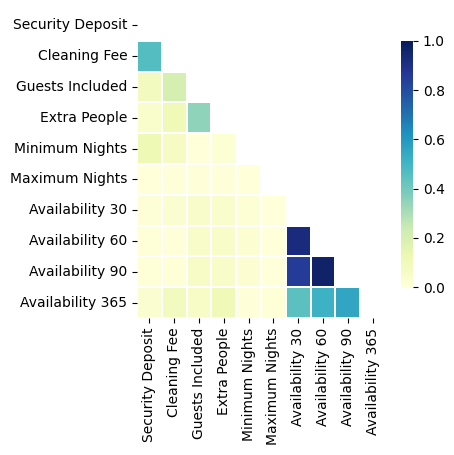

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr = np.abs(train[val_rent].drop(['Features', 'Cancellation Policy'], axis=1).corr())

# Création du masque pour le triangle supérieur
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configuration de la figure matplotlib
f, ax = plt.subplots(figsize=(4, 4))

# Tracer la heatmap avec le masque et les proportions correctes
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=0.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})

plt.show()


In [163]:
train[['ID'] + val_rent][['ID', 'Cancellation Policy']].groupby('Cancellation Policy', dropna=False).count()


,ID
Cancellation Policy,
flexible,3243
flexible_new,7
moderate,2985
moderate_new,14
strict,4022
strict_new,28
super_strict_30,12
super_strict_60,23


In [164]:
train[['ID']+ val_rent][['ID', 'Features']].groupby('Features', dropna = False).count()

,ID
Features,
Host Has Profile Pic,34
"Host Has Profile Pic,Host Identity Verified",55
"Host Has Profile Pic,Host Identity Verified,Instant Bookable",17
"Host Has Profile Pic,Host Identity Verified,Is Location Exact",181
"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable",41
...,...
"Is Location Exact,Requires License",15
"Is Location Exact,Requires License,Instant Bookable",5
Requires License,10


In [165]:
train[val_rent]['Features'].str.split(',').explode().drop_duplicates().tolist()


['Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Instant Bookable',
 'Require Guest Profile Picture',
 'Require Guest Phone Verification',
 nan]

Tras revisar los estadísticos iniciales, se observa que varias variables tienen un potencial impacto sobre el precio. El **Security Deposit** y el **Cleaning Fee**, ambos numéricos, se relacionan con el precio y sus valores nulos se codificarán como 0, considerando que los Airbnbs sin estos cargos no requieren un depósito o tarifa de limpieza. **Guests Included** y **Extra People**, también numéricas, se mantienen en el estudio, ya que tienen características similares a la variable **Accommodates** y podrían mostrar correlación con ella. Las variables **Minimum Nights** y **Maximum Nights** son igualmente relevantes y no presentan valores nulos. En cuanto a las variables de disponibilidad (**Availability 30**, **Availability 60**, **Availability 90**, **Availability 365**), se observa que **Availability 30** tiene una correlación directa con las otras, por lo que se puede simplificar a una variable dicotómica que indique si la disponibilidad es menor o mayor a 30 días. La **Cancellation Policy**, siendo una variable categórica, se debe codificar para su análisis. Finalmente, **Features**, al igual que **Amenities**, se descarta por ahora debido a su complejidad y la necesidad de una mayor limpieza para su inclusión en el estudio.

In [166]:
val_rent



['Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Cancellation Policy',
 'Features']

####  las reseñas

In [167]:
train[['Price'] + val_res].head()

,Price,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
13748,45.0,15,89.0,9.0,10.0,10.0,10.0,9.0,9.0,1.61
9656,76.0,25,96.0,10.0,10.0,10.0,10.0,10.0,10.0,3.59
1379,50.0,5,80.0,8.0,8.0,9.0,9.0,9.0,8.0,0.97
11537,23.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8021,56.0,23,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.22


In [168]:
custom_descibre(train[['Price'] + val_res])

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
Price,10334,73.834817,70.928807,9.00,35.00,56.0,89.00,969.00,0,1.000000
Number of Reviews,10334,22.705825,38.366503,0.00,1.00,7.0,27.00,446.00,0,-0.061589
Review Scores Rating,8037,91.769192,8.886800,20.00,89.00,94.0,98.00,100.00,2297,0.067228
Review Scores Accuracy,8020,9.423940,0.910553,2.00,9.00,10.0,10.00,10.00,2314,0.065418
Review Scores Cleanliness,8024,9.338360,0.968039,2.00,9.00,10.0,10.00,10.00,2310,0.084215
Review Scores Checkin,8011,9.626514,0.789011,2.00,9.00,10.0,10.00,10.00,2323,-0.004555
Review Scores Communication,8025,9.648100,0.762748,2.00,9.00,10.0,10.00,10.00,2309,0.006063
Review Scores Location,8009,9.549757,0.763525,2.00,9.00,10.0,10.00,10.00,2325,0.106880
Review Scores Value,8008,9.225400,0.939546,2.00,9.00,9.0,10.00,10.00,2326,0.021906
Reviews per Month,8148,1.864948,1.868944,0.02,0.45,1.2,2.74,17.21,2186,-0.095557


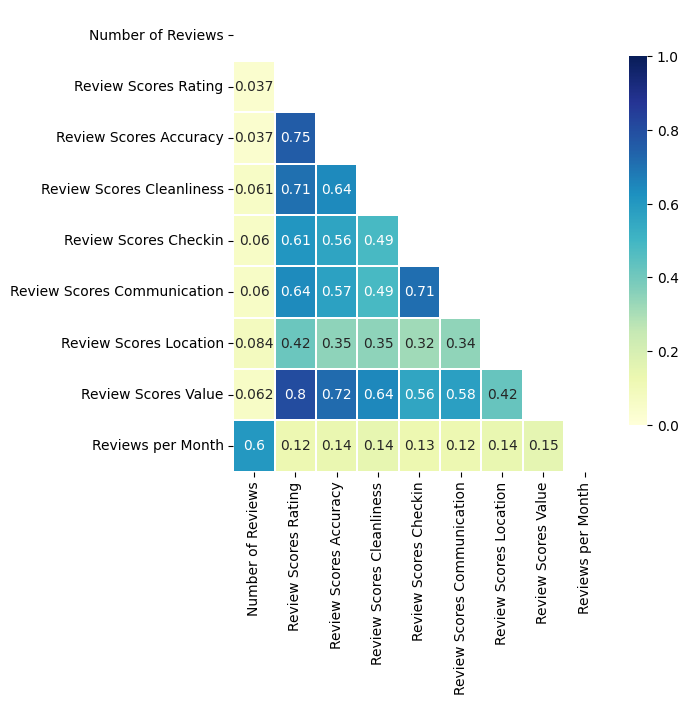

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation entre les variables des évaluations
corr_matrix = np.abs(train[val_res].corr())

# Création d'un masque pour masquer la moitié supérieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configuration de la taille de la figure pour l'affichage
plt.figure(figsize=(6, 6))

# Génération de la carte thermique de la matrice de corrélation
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="YlGnBu", vmin=0, vmax=1,
            cbar_kws={'shrink': 0.8}, linewidths=0.1, center=0.5)

# Affichage de la carte thermique
plt.show()



Tras observar las variables del bloque de reseñas, podemos concluir que todas son de tipo numérico y presentan un número similar de valores faltantes. Esto sugiere que cuando no se deja una reseña, los valores permanecen nulos, pero cuando se realiza una, se opina sobre todos los aspectos del alojamiento. En términos generales, estas variables tienen un gran potencial para aportar información sobre la calidad del alojamiento y el servicio. Sin embargo, dos variables destacan por encima de las demás: Review Scores Value y Review Scores Rating, ya que ambas presentan una correlación superior a lo esperado, y su nombre indica que probablemente estén relacionadas con la calificación general del alojamiento. Por lo tanto, decidimos mantener estas dos variables en el análisis, y realizaremos un análisis de correlación posterior para determinar cuál de ellas tiene un mayor impacto en el modelo

#### "Transformación de datos"

En base al análisis exploratorio realizado sobre las variables agrupadas, procederemos a codificar aquellas que son relevantes para la estimación del precio y eliminaremos manualmente las que no lo son. Una vez seleccionadas las variables "candidatas", crearemos un nuevo conjunto de datos para entrenamiento (`train`), con solo aquellas variables que consideramos pertinentes. A continuación, aplicaremos un método de selección de variables y evaluaremos su efectividad de manera conjunta. 

El primer paso consistirá en construir el nuevo dataframe `train` con solo las variables seleccionadas como candidatas, lo que nos permitirá iniciar la fase de modelado y selección más detallada de las variables.

In [170]:
# Lista de variables candidatas seleccionadas para el análisis
variables_candidatas = [
    'ID', 'Price', 'Host Response Rate', 'Host Total Listings Count', 
    'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 
    'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit', 
    'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 
    'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 
    'Availability 365', 'Cancellation Policy', 'Review Scores Value', 'Review Scores Rating'
]

# Filtramos el DataFrame para mantener solo las variables candidatas
train_pre_process = train[variables_candidatas]

# Verificamos si hay valores nulos en las columnas seleccionadas
missing_data = train_pre_process.isnull().sum()
print("Valores nulos por columna:\n", missing_data)

# Eliminas los registros que contienen valores nulos si es necesario
train_pre_process = train_pre_process.dropna()

# Confirmamos que los datos están listos para el análisis
print(f"Nuevo dataset de entrenamiento con {train_pre_process.shape[0]} observaciones y {train_pre_process.shape[1]} variables.")


Valores nulos por columna:
 ID                              0
Price                           0
Host Response Rate           1322
Host Total Listings Count       2
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                      34
Bedrooms                       16
Beds                           27
Bed Type                        0
Security Deposit             5921
Cleaning Fee                 4181
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Cancellation Policy             0
Review Scores Value          2326
Review Scores Rating         2297
dtype: int64
Nuevo dataset de entrenamiento con 2898 observaciones y 26 variables.


In [171]:
# Filtramos el DataFrame de test para mantener solo las variables candidatas
test_pre_process = test[variables_candidatas]

# Verificamos si hay valores nulos en las columnas seleccionadas del DataFrame de test
missing_data_test = test_pre_process.isnull().sum()
print("Valores nulos por columna en el set de test:\n", missing_data_test)

# Eliminas los registros que contienen valores nulos si es necesario
test_pre_process = test_pre_process.dropna()

# Confirmamos que los datos de test están listos para el análisis
print(f"Nuevo dataset de test con {test_pre_process.shape[0]} observaciones y {test_pre_process.shape[1]} variables.")


Valores nulos por columna en el set de test:
 ID                              0
Price                           0
Host Response Rate            574
Host Total Listings Count       1
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                      20
Bedrooms                        9
Beds                           21
Bed Type                        0
Security Deposit             2588
Cleaning Fee                 1904
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Cancellation Policy             0
Review Scores Value          1007
Review Scores Rating          999
dtype: int64
Nuevo dataset de test con 1193 observaciones y 26 variabl

Hasta este punto hemos reducido el dataset de 89 columnas a 24 columnas. Lo ideal sería habernos juntado con negocio (el owner del modelo dentro de la empresa Airbnb) para indicar cuales son las variables bajo su criterio que más aportan en la definición del precio para no descartarlas en esta primera selección del analista.

In [172]:
train_pre_process.head()

,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
1379,14853284,50.0,100.0,11.0,40.407502,-3.699373,Apartment,Entire home/apt,4,1.0,...,10,1,1125,12,38,61,231,strict,8.0,80.0
8021,16119061,56.0,100.0,1.0,40.408940,-3.698995,Apartment,Entire home/apt,3,1.0,...,0,1,1125,1,3,8,80,moderate,10.0,98.0
14467,7832432,94.0,100.0,1.0,40.420846,-3.698198,Apartment,Entire home/apt,3,1.0,...,31,2,1125,11,20,36,196,strict,10.0,96.0
716,1100506,59.0,100.0,3.0,41.393231,2.190272,Apartment,Private room,2,1.0,...,9,2,15,10,21,51,141,moderate,10.0,97.0
911,1238018,80.0,100.0,1.0,40.414365,-3.700038,Apartment,Entire home/apt,4,1.0,...,20,3,365,1,1,11,42,moderate,9.0,89.0


### "Conversión de variables categóricas a numéricas"

Dado que, por lo general, los kernels de los modelos no aceptan variables de tipo string, procederemos a codificar las variables categóricas. Asignar un valor aleatorio a cada categoría no tiene sentido, ya que los números carecerían de magnitud. Por ello, optaremos por utilizar una representación vectorial o, en su defecto, aplicaremos una codificación basada en el estudio de la relación entre la variable dependiente e independiente (target encoding).

In [173]:
# Lista de variables categóricas a codificar
categorical = ['Property Type', 'Cancellation Policy']

# Diccionario para almacenar las medias de cada categoría
mean_map = {}

# Aplicamos el encoding por la media (target encoding)
for c in categorical:
    # Comprobamos si hay valores nulos antes de proceder
    if train_pre_process[c].isnull().any():
        print(f"Atención: La columna {c} contiene valores nulos.")
    
    # Calculamos la media de 'Price' para cada categoría
    mean = train_pre_process.groupby(c)['Price'].mean()
    
    # Reemplazamos las categorías por la media correspondiente
    train_pre_process[c] = train_pre_process[c].map(mean)
    
    # Almacenamos las medias en un diccionario para consulta futura
    mean_map[c] = mean

# Mostramos las primeras filas para verificar los cambios
train_pre_process.head()


,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
1379,14853284,50.0,100.0,11.0,40.407502,-3.699373,86.035786,Entire home/apt,4,1.0,...,10,1,1125,12,38,61,231,93.546543,8.0,80.0
8021,16119061,56.0,100.0,1.0,40.408940,-3.698995,86.035786,Entire home/apt,3,1.0,...,0,1,1125,1,3,8,80,77.012422,10.0,98.0
14467,7832432,94.0,100.0,1.0,40.420846,-3.698198,86.035786,Entire home/apt,3,1.0,...,31,2,1125,11,20,36,196,93.546543,10.0,96.0
716,1100506,59.0,100.0,3.0,41.393231,2.190272,86.035786,Private room,2,1.0,...,9,2,15,10,21,51,141,77.012422,10.0,97.0
911,1238018,80.0,100.0,1.0,40.414365,-3.700038,86.035786,Entire home/apt,4,1.0,...,20,3,365,1,1,11,42,77.012422,9.0,89.0


In [174]:
# Aplicamos el target encoding al conjunto de test utilizando las medias del conjunto de entrenamiento
for c in categorical:
    # Comprobamos si la columna existe en el conjunto de test antes de aplicar el encoding
    if c in test_pre_process.columns:
        test_pre_process[c] = test_pre_process[c].map(mean_map[c])

# Mostramos las primeras filas del conjunto de test para verificar los cambios
test_pre_process.head()


,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
11865,12741393,110.0,61.0,11.0,40.441844,-3.676955,86.035786,Entire home/apt,3,1.0,...,0,7,90,18,43,48,323,75.851385,8.0,100.0
6441,17798768,69.0,100.0,16.0,40.421602,-3.704345,93.553571,Entire home/apt,2,1.0,...,0,1,365,11,36,62,337,93.546543,10.0,100.0
4129,16249738,44.0,100.0,1.0,40.422227,-3.697623,86.035786,Entire home/apt,4,1.0,...,50,2,12,0,18,41,77,75.851385,9.0,95.0
2419,11134169,75.0,100.0,1.0,40.422412,-3.702625,86.035786,Entire home/apt,2,1.0,...,274,3,1125,12,33,56,331,77.012422,10.0,94.0
1897,8246010,241.0,100.0,2.0,39.511956,2.545481,60.000000,Entire home/apt,8,4.0,...,40,3,90,22,38,43,249,71.200000,10.0,97.0


#####  "Método de Codificación Ordinal"

In [175]:
# Mapeo de los tipos de habitación a valores numéricos
mapping_room = {'Entire home/apt': 3, 'Private room': 2, 'Shared room': 1}

# Aplicamos el mapeo al conjunto de entrenamiento para la columna 'Room Type'
train_pre_process['Room Type'] = train_pre_process['Room Type'].map(mapping_room)

# Mostramos las primeras filas del dataframe para verificar los cambios
train_pre_process.head()


,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
1379,14853284,50.0,100.0,11.0,40.407502,-3.699373,86.035786,3,4,1.0,...,10,1,1125,12,38,61,231,93.546543,8.0,80.0
8021,16119061,56.0,100.0,1.0,40.408940,-3.698995,86.035786,3,3,1.0,...,0,1,1125,1,3,8,80,77.012422,10.0,98.0
14467,7832432,94.0,100.0,1.0,40.420846,-3.698198,86.035786,3,3,1.0,...,31,2,1125,11,20,36,196,93.546543,10.0,96.0
716,1100506,59.0,100.0,3.0,41.393231,2.190272,86.035786,2,2,1.0,...,9,2,15,10,21,51,141,77.012422,10.0,97.0
911,1238018,80.0,100.0,1.0,40.414365,-3.700038,86.035786,3,4,1.0,...,20,3,365,1,1,11,42,77.012422,9.0,89.0


In [176]:
# Diccionario de mapeo para tipos de camas con valores numéricos
mapping_bed = {
    'Real Bed': 5,     # Cama real, se considera la opción más cómoda
    'Pull-out Sofa': 4, # Sofá cama, relativamente cómodo pero menos que una cama real
    'Futon': 3,         # Futón, opción intermedia
    'Couch': 2,         # Sofá, menos cómodo que un futón
    'Airbed': 1         # Colchón inflable, se asume que es la opción menos cómoda
}

# Verificación: Comprobamos si todos los valores en 'Bed Type' están en el diccionario
missing_beds = train_pre_process['Bed Type'][~train_pre_process['Bed Type'].isin(mapping_bed.keys())].unique()

if len(missing_beds) > 0:
    print(f"Valores no mapeados encontrados en 'Bed Type': {missing_beds}")
else:
    # Aplicar el mapeo al conjunto de entrenamiento para la columna 'Bed Type'
    train_pre_process['Bed Type'] = train_pre_process['Bed Type'].map(mapping_bed)

# Verificación de los cambios
train_pre_process[['Bed Type']].head()


,Bed Type
1379,5
8021,4
14467,5
716,5
911,4


In [177]:
# Aplicar el mapeo de 'Room Type' al conjunto de prueba
test_pre_process['Room Type'] = test_pre_process['Room Type'].map(mapping_room)

# Verificación: Comprobamos si hay valores no mapeados en 'Room Type'
missing_rooms = test_pre_process['Room Type'][~test_pre_process['Room Type'].isin(mapping_room.values())].unique()
if len(missing_rooms) > 0:
    print(f"Valores no mapeados encontrados en 'Room Type': {missing_rooms}")
    
# Aplicar el mapeo de 'Bed Type' al conjunto de prueba
test_pre_process['Bed Type'] = test_pre_process['Bed Type'].map(mapping_bed)

# Verificación: Comprobamos si hay valores no mapeados en 'Bed Type'
missing_beds = test_pre_process['Bed Type'][~test_pre_process['Bed Type'].isin(mapping_bed.values())].unique()
if len(missing_beds) > 0:
    print(f"Valores no mapeados encontrados en 'Bed Type': {missing_beds}")

# Mostrar las primeras filas de las columnas para verificar los cambios
test_pre_process[['Room Type', 'Bed Type']].head()


,Room Type,Bed Type
11865,3,5
6441,3,5
4129,3,5
2419,3,5
1897,3,5


In [178]:
train_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2898 entries, 1379 to 266
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2898 non-null   int64  
 1   Price                      2898 non-null   float64
 2   Host Response Rate         2898 non-null   float64
 3   Host Total Listings Count  2898 non-null   float64
 4   Latitude                   2898 non-null   float64
 5   Longitude                  2898 non-null   float64
 6   Property Type              2898 non-null   float64
 7   Room Type                  2898 non-null   int64  
 8   Accommodates               2898 non-null   int64  
 9   Bathrooms                  2898 non-null   float64
 10  Bedrooms                   2898 non-null   float64
 11  Beds                       2898 non-null   float64
 12  Bed Type                   2898 non-null   int64  
 13  Security Deposit           2898 non-null   float64


In [179]:
custom_descibre(train_pre_process)

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
ID,2898,9.266755e+06,5.477586e+06,18628.000000,4.338084e+06,9.765764e+06,1.423094e+07,1.795242e+07,0,1.000000
Price,2898,8.548206e+01,5.613512e+01,10.000000,5.000000e+01,7.200000e+01,1.000000e+02,6.000000e+02,0,-0.020192
Host Response Rate,2898,9.636473e+01,1.116629e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0,0.027906
Host Total Listings Count,2898,1.240097e+01,3.045595e+01,0.000000,1.000000e+00,3.000000e+00,8.000000e+00,2.070000e+02,0,-0.033397
Latitude,2898,4.050567e+01,3.631132e+00,-37.815440,4.041099e+01,4.041875e+01,4.042675e+01,5.596691e+01,0,-0.000642
Longitude,2898,-4.499109e+00,1.352901e+01,-122.429329,-3.706903e+00,-3.701247e+00,-3.693402e+00,1.512701e+02,0,0.023863
Property Type,2898,8.548206e+01,6.984573e+00,25.000000,8.603579e+01,8.603579e+01,8.603579e+01,2.400000e+02,0,0.024513
Room Type,2898,2.873361e+00,3.418378e-01,1.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0,0.046485
Accommodates,2898,4.107660e+00,2.137039e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01,0,0.007219
Bathrooms,2898,1.299172e+00,5.758391e-01,0.000000,1.000000e+00,1.000000e+00,1.500000e+00,6.000000e+00,0,0.012066


#### "Manejo de valores faltantes"

El tratamiento de los valores nulos es fundamental, ya que muchos algoritmos no pueden manejarlos directamente dentro del kernel. Al observar la tabla anterior, vemos que algunos valores nulos pueden ser codificados, mientras que otros no. En el caso de variables relacionadas con comisiones o depósitos, la ausencia de información puede interpretarse como la no existencia de dichos valores, por lo que los nulos pueden ser reemplazados por 0. Sin embargo, en situaciones como las reseñas, asignar un valor a los nulos alteraría la integridad de la muestra, por lo que la opción más segura es eliminar esas observaciones, esperando que esto reduzca el impacto de los valores nulos en otras variables.

In [180]:
# Rellenar los valores nulos de las variables que podemos asumir como 0
columns_fill_zero = ['Security Deposit', 'Cleaning Fee', 'Bathrooms', 'Bedrooms', 'Beds']
train_pre_process[columns_fill_zero] = train_pre_process[columns_fill_zero].fillna(0)

# Eliminar filas con valores nulos en las variables críticas
columns_not_null = ['Review Scores Value', 'Review Scores Rating', 'Host Response Rate']
train_pre_process = train_pre_process.dropna(subset=columns_not_null)

train_pre_process.head()


,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
1379,14853284,50.0,100.0,11.0,40.407502,-3.699373,86.035786,3,4,1.0,...,10,1,1125,12,38,61,231,93.546543,8.0,80.0
8021,16119061,56.0,100.0,1.0,40.408940,-3.698995,86.035786,3,3,1.0,...,0,1,1125,1,3,8,80,77.012422,10.0,98.0
14467,7832432,94.0,100.0,1.0,40.420846,-3.698198,86.035786,3,3,1.0,...,31,2,1125,11,20,36,196,93.546543,10.0,96.0
716,1100506,59.0,100.0,3.0,41.393231,2.190272,86.035786,2,2,1.0,...,9,2,15,10,21,51,141,77.012422,10.0,97.0
911,1238018,80.0,100.0,1.0,40.414365,-3.700038,86.035786,3,4,1.0,...,20,3,365,1,1,11,42,77.012422,9.0,89.0


In [181]:
custom_descibre(train_pre_process)

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
ID,2898,9.266755e+06,5.477586e+06,18628.000000,4.338084e+06,9.765764e+06,1.423094e+07,1.795242e+07,0,1.000000
Price,2898,8.548206e+01,5.613512e+01,10.000000,5.000000e+01,7.200000e+01,1.000000e+02,6.000000e+02,0,-0.020192
Host Response Rate,2898,9.636473e+01,1.116629e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0,0.027906
Host Total Listings Count,2898,1.240097e+01,3.045595e+01,0.000000,1.000000e+00,3.000000e+00,8.000000e+00,2.070000e+02,0,-0.033397
Latitude,2898,4.050567e+01,3.631132e+00,-37.815440,4.041099e+01,4.041875e+01,4.042675e+01,5.596691e+01,0,-0.000642
Longitude,2898,-4.499109e+00,1.352901e+01,-122.429329,-3.706903e+00,-3.701247e+00,-3.693402e+00,1.512701e+02,0,0.023863
Property Type,2898,8.548206e+01,6.984573e+00,25.000000,8.603579e+01,8.603579e+01,8.603579e+01,2.400000e+02,0,0.024513
Room Type,2898,2.873361e+00,3.418378e-01,1.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0,0.046485
Accommodates,2898,4.107660e+00,2.137039e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01,0,0.007219
Bathrooms,2898,1.299172e+00,5.758391e-01,0.000000,1.000000e+00,1.000000e+00,1.500000e+00,6.000000e+00,0,0.012066


In [182]:
# Rellenar los valores nulos de las variables que podemos asumir como 0
columns_fill_zero = ['Security Deposit', 'Cleaning Fee', 'Bathrooms', 'Bedrooms', 'Beds']
test_pre_process[columns_fill_zero] = test_pre_process[columns_fill_zero].fillna(0)

# Eliminar filas con valores nulos en las variables críticas
columns_not_null = ['Review Scores Value', 'Review Scores Rating', 'Host Response Rate']
test_pre_process = test_pre_process.dropna(subset=columns_not_null)

test_pre_process.head()


,ID,Price,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,...,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Cancellation Policy,Review Scores Value,Review Scores Rating
11865,12741393,110.0,61.0,11.0,40.441844,-3.676955,86.035786,3,3,1.0,...,0,7,90,18,43,48,323,75.851385,8.0,100.0
6441,17798768,69.0,100.0,16.0,40.421602,-3.704345,93.553571,3,2,1.0,...,0,1,365,11,36,62,337,93.546543,10.0,100.0
4129,16249738,44.0,100.0,1.0,40.422227,-3.697623,86.035786,3,4,1.0,...,50,2,12,0,18,41,77,75.851385,9.0,95.0
2419,11134169,75.0,100.0,1.0,40.422412,-3.702625,86.035786,3,2,1.0,...,274,3,1125,12,33,56,331,77.012422,10.0,94.0
1897,8246010,241.0,100.0,2.0,39.511956,2.545481,60.000000,3,8,4.0,...,40,3,90,22,38,43,249,71.200000,10.0,97.0


In [183]:
custom_descibre(test_pre_process)

,count,mean,std,min,25%,50%,75%,max,nulls,Corr
ID,1193,9.120568e+06,5.553876e+06,19864.000000,4.265405e+06,9.470166e+06,1.409894e+07,1.802802e+07,0,1.000000
Price,1193,8.421375e+01,5.916466e+01,10.000000,5.000000e+01,7.000000e+01,9.600000e+01,8.000000e+02,0,-0.048632
Host Response Rate,1193,9.650042e+01,1.150067e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0,0.060654
Host Total Listings Count,1193,1.180721e+01,3.061333e+01,0.000000,1.000000e+00,2.000000e+00,8.000000e+00,2.070000e+02,0,-0.009800
Latitude,1193,4.054936e+01,4.255403e+00,-37.839439,4.041070e+01,4.041812e+01,4.042676e+01,5.594576e+01,0,-0.005667
Longitude,1193,-3.919443e+00,1.319929e+01,-122.355344,-3.706638e+00,-3.701262e+00,-3.694571e+00,1.512060e+02,0,0.019555
Property Type,1193,8.547095e+01,7.932945e+00,34.000000,8.603579e+01,8.603579e+01,8.603579e+01,2.400000e+02,0,0.051077
Room Type,1193,2.868399e+00,3.503817e-01,1.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,0,0.029903
Accommodates,1193,3.991618e+00,2.064382e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01,0,0.019010
Bathrooms,1193,1.274937e+00,5.600071e-01,0.500000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+00,0,-0.009659


#### "Reducción de Dimensionalidad" 

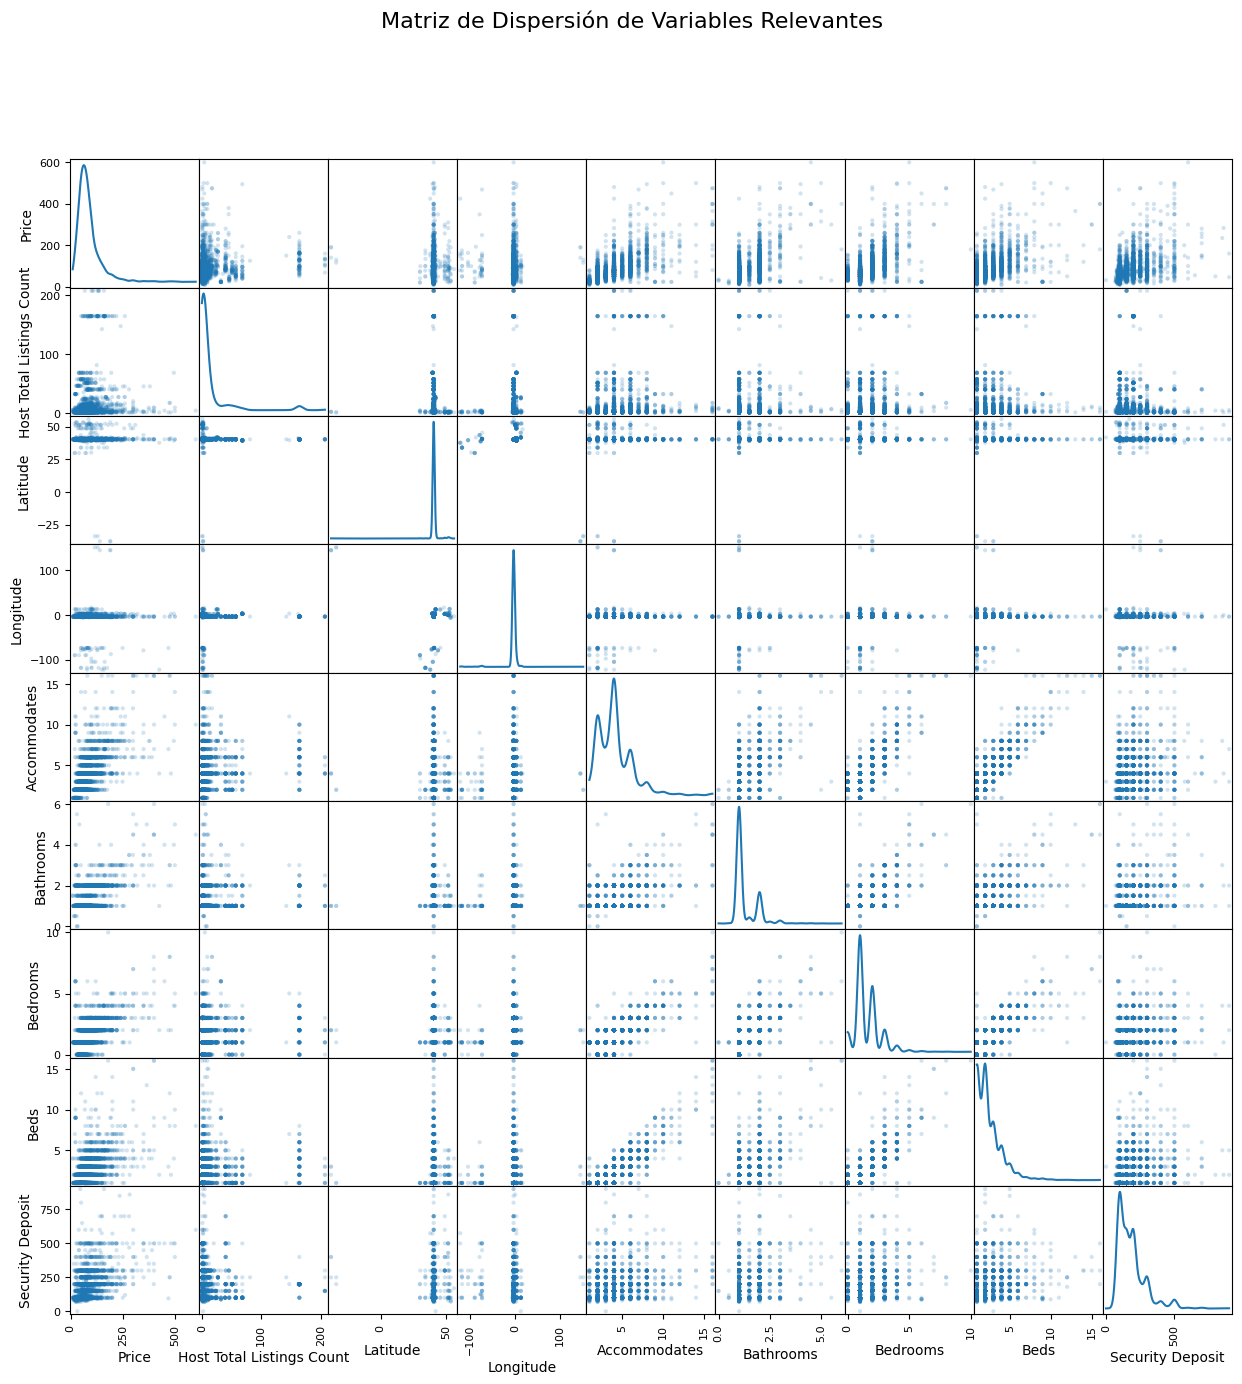

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

# Selección de un subconjunto de columnas relevantes para la matriz de dispersión
columns_to_plot = ['Price', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit']

# Generación de la matriz de dispersión
pd.plotting.scatter_matrix(train_pre_process[columns_to_plot], alpha=0.2, figsize=(15, 15), diagonal='kde')

# Mostrar la gráfica
plt.suptitle("Matriz de Dispersión de Variables Relevantes", fontsize=16)
plt.show()


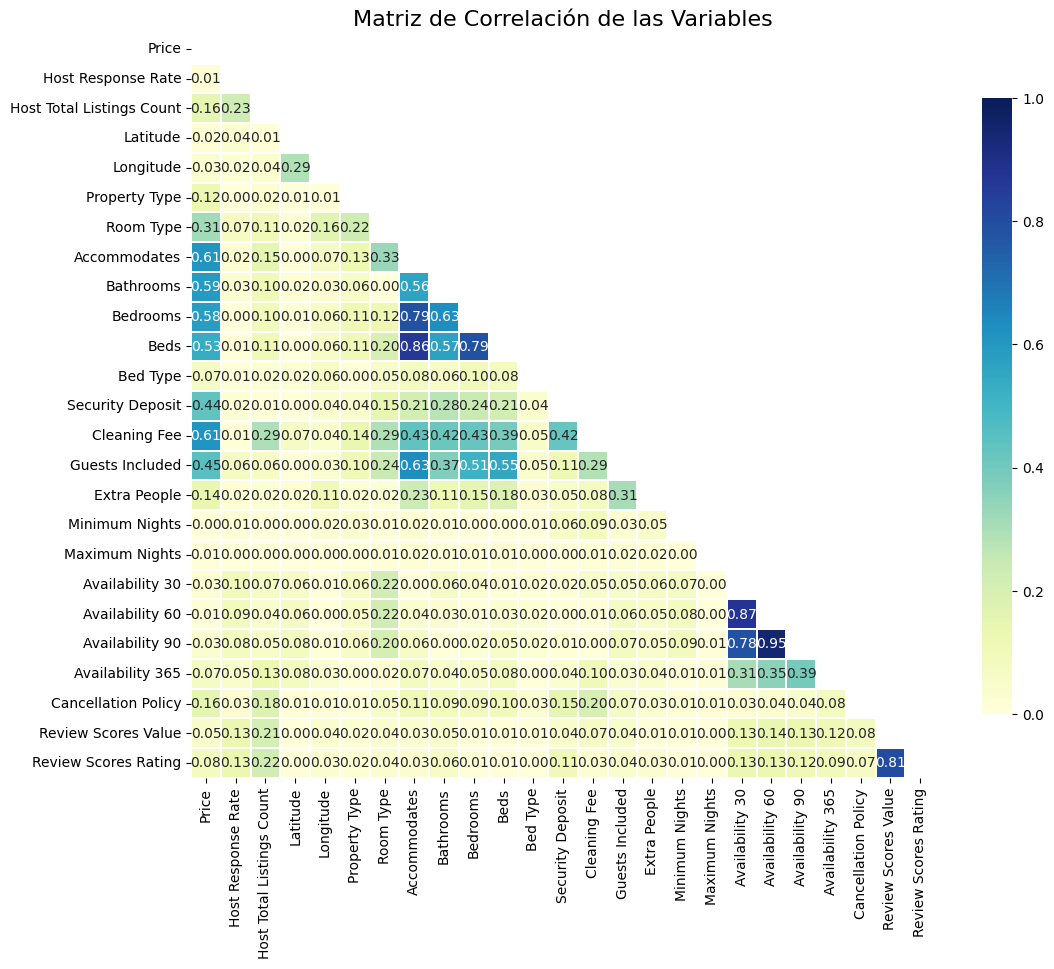

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculamos la matriz de correlación, excluyendo la columna 'ID'
corr = np.abs(train_pre_process.drop(['ID'], axis=1).corr())

# Generamos una máscara para ocultar la parte superior de la matriz
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configuramos la figura de matplotlib
plt.figure(figsize=(12, 10))

# Dibujamos el heatmap con la máscara y una relación de aspecto adecuada
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cbar_kws={"shrink": .8}, square=True)

# Título de la gráfica
plt.title("Matriz de Correlación de las Variables", fontsize=16)

# Mostrar la gráfica
plt.show()


#####  método Lasso

In [186]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sélectionner les variables indépendantes (X) et la variable dépendante (y)
X = train_pre_process.iloc[:, 2:]
y = train_pre_process['Price']

# Normalisation des variables indépendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer et ajuster le modèle LassoCV avec une validation croisée
lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X_scaled, y)

# Afficher les variables avec des coefficients non nuls
non_zero_coeffs = X.columns[lasso.coef_ != 0]
print("Variables avec des coefficients non nuls :")
print(non_zero_coeffs)

# Afficher la valeur optimale de alpha (régularisation)
print(f"\nValeur optimale de alpha : {lasso.alpha_}")

# Afficher les coefficients non nuls avec leur valeur
print("\nCoefficients non nuls et leur valeur :")
for col, coef in zip(non_zero_coeffs, lasso.coef_[lasso.coef_ != 0]):
    print(f"{col}: {coef:.4f}")


Variables avec des coefficients non nuls :
Index(['Host Response Rate', 'Latitude', 'Longitude', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Availability 30', 'Availability 90',
       'Cancellation Policy', 'Review Scores Value', 'Review Scores Rating'],
      dtype='object')

Valeur optimale de alpha : 0.2263871019123301

Coefficients non nuls et leur valeur :
Host Response Rate: -1.3252
Latitude: -0.9524
Longitude: -3.6744
Room Type: 8.2793
Accommodates: 10.6624
Bathrooms: 14.6868
Bedrooms: 6.4076
Beds: -4.0890
Bed Type: 0.2011
Security Deposit: 8.5616
Cleaning Fee: 14.6653
Guests Included: 4.8629
Extra People: -0.2669
Minimum Nights: -1.1964
Availability 30: 1.6255
Availability 90: -0.1490
Cancellation Policy: 1.0968
Review Scores Value: 1.0417
Review Scores Rating: 2.8065


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012445; total time=   0.0s
[CV] END .......................alpha=0.0001456

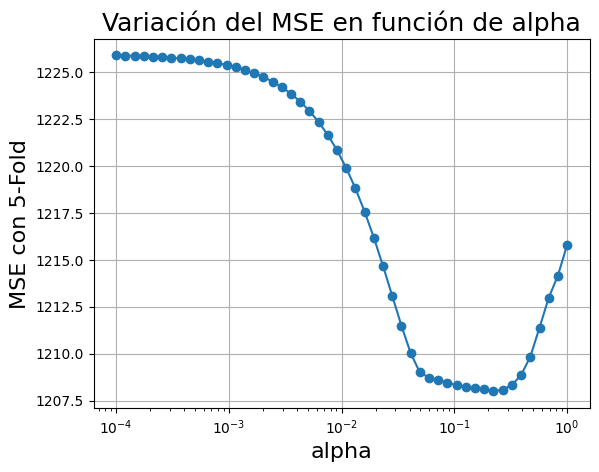

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar las variables independientes (X) y la variable dependiente (y)
X = train_pre_process.iloc[:, 2:]
y = train_pre_process['Price']

# Normalización de las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir un vector de valores de alpha a probar
alpha_vector = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_vector}

# Aplicar GridSearchCV para realizar una búsqueda exhaustiva
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_scaled, y)

# Mostrar los mejores resultados
print("Mejor puntuación en validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores parámetros: {}".format(grid.best_params_))

# Mostrar el puntaje de validación cruzada para cada valor de alpha
scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('MSE con 5-Fold', fontsize=16)
plt.title('Variación del MSE en función de alpha', fontsize=18)
plt.grid(True)
plt.show()


#####  método Random Forest

Variables seleccionadas por Random Forest: ['Host Total Listings Count', 'Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Review Scores Rating']


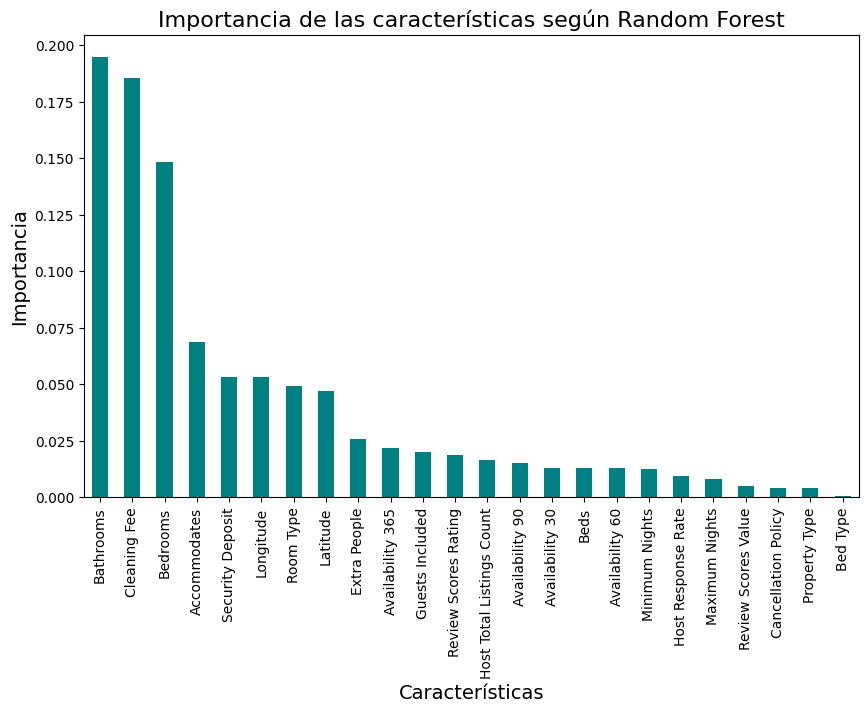

In [188]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables independientes (X) y la variable dependiente (y)
X = train_pre_process.iloc[:, 2:]  # Las columnas desde la tercera hasta la última
y = train_pre_process['Price']     # La columna 'Price' como variable dependiente

# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de las características
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Filtrar las características con importancia mayor a 0.01
selected_features_rf = importances[importances > 0.01].index.tolist()

# Imprimir las características seleccionadas por Random Forest
print("Variables seleccionadas por Random Forest:", selected_features_rf)

# Ordenar las características por su importancia
importances_sorted = importances.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar', color='teal')
plt.title('Importancia de las características según Random Forest', fontsize=16)
plt.ylabel('Importancia', fontsize=14)
plt.xlabel('Características', fontsize=14)
plt.show()


In [189]:
# Variables seleccionadas para el modelo
variables_seleccionadas = ['Host Response Rate', 'Host Total Listings Count', 'Property Type', 'Room Type', 
                           'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
                           'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 
                           'Availability 365', 'Cancellation Policy', 'Review Scores Value', 'Review Scores Rating']

# Depuración de datos: Filtramos las variables seleccionadas y nos aseguramos de que los datos no contengan valores nulos importantes
train_depurado = train_pre_process[variables_seleccionadas].dropna(subset=['Review Scores Value', 'Review Scores Rating', 'Host Response Rate'])

# Filtramos también el conjunto de test, asegurándonos que no haya datos faltantes en las variables clave
test_depurado = test_pre_process[variables_seleccionadas].dropna(subset=['Review Scores Value', 'Review Scores Rating', 'Host Response Rate'])

# Variable dependiente: 'Price', ya que es la que queremos predecir
y_train = train_pre_process['Price']
y_test = test_pre_process['Price']

# Verifica la integridad de las variables
print("Número de registros en el conjunto de entrenamiento después de depuración:", train_depurado.shape[0])
print("Número de registros en el conjunto de test después de depuración:", test_depurado.shape[0])

# Opcional: Verifica si hay datos nulos restantes
print("Datos nulos en el conjunto de entrenamiento:", train_depurado.isnull().sum())
print("Datos nulos en el conjunto de test:", test_depurado.isnull().sum())



Número de registros en el conjunto de entrenamiento después de depuración: 2898
Número de registros en el conjunto de test después de depuración: 1193
Datos nulos en el conjunto de entrenamiento: Host Response Rate           0
Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Bed Type                     0
Security Deposit             0
Cleaning Fee                 0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Availability 365             0
Cancellation Policy          0
Review Scores Value          0
Review Scores Rating         0
dtype: int64
Datos nulos en el conjunto de test: Host Response Rate           0
Host Total Listings Count    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms  

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012445; total time=   0.0s
[CV] END .......................alpha=0.0001456

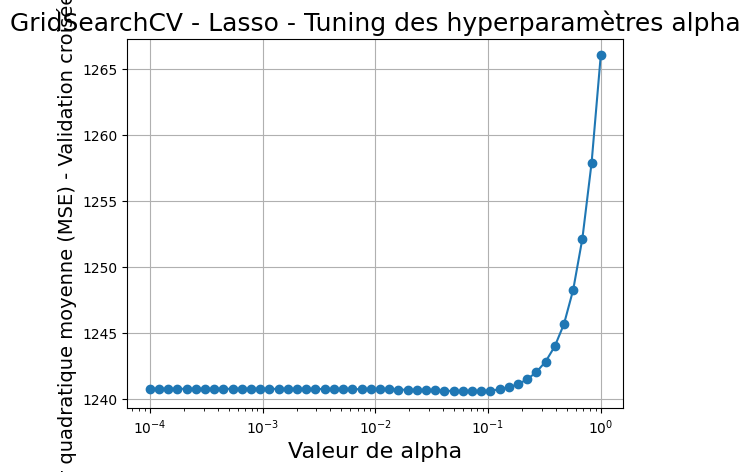

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Sélection des features et de la cible
X = train_depurado  # Données d'entrée (features)
y = train_pre_process['Price']  # Variable cible (prix)

# Définir les valeurs possibles pour l'hyperparamètre alpha
alpha_vector = np.logspace(-4, 0, 50)

# Paramètres à tester dans GridSearchCV
param_grid = {'alpha': alpha_vector}

# Initialiser et entraîner GridSearchCV avec Lasso
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5, verbose=2)
grid.fit(X, y)

# Affichage du meilleur score de validation croisée
print("Meilleur score moyen de validation croisée: {:.3f}".format(grid.best_score_))
print("Meilleurs paramètres trouvés: {}".format(grid.best_params_))

# Récupération et affichage des scores pour chaque valeur de alpha
scores = -1 * np.array(grid.cv_results_['mean_test_score'])

# Tracer la courbe des MSE en fonction des valeurs d'alpha
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('Valeur de alpha', fontsize=16)
plt.ylabel('Erreur quadratique moyenne (MSE) - Validation croisée 5-Folds', fontsize=14)
plt.title('GridSearchCV - Lasso - Tuning des hyperparamètres alpha', fontsize=18)
plt.grid(True)
plt.show()


A partir de la información obtenida mediante ambos métodos de selección de variables y una primera evaluación con validación cruzada, observamos un error cuadrático medio elevado para el precio, lo que sugiere que el modelo podría tener un rendimiento deficiente. Por lo tanto, decidimos omitir temporalmente las variables relacionadas con la longitud y latitud, y nos centramos exclusivamente en la métrica de "availability 365", que indica el número de días que el Airbnb estará disponible en el próximo año. Con esta configuración, probaremos diferentes tipos de modelos de regresión.

Probamos varios modelos vistos en clase que se puedan utilizar para un problema de regressión a la variable Precio del Airbnb

In [191]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Definir los modelos a probar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Almacenar los resultados
results = []

# Evaluar cada modelo usando cross-validation
for name, model in models.items():
    # Realizamos la validación cruzada con 5 pliegues y calculamos el error cuadrático medio negativo
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Guardamos los resultados en el diccionario
    mean_mse = np.mean(-scores)  # Convertir a valor positivo
    std_mse = np.std(-scores)    # Calcular desviación estándar
    results.append((name, mean_mse, std_mse))

# Crear un DataFrame para una visualización más clara
results_df = pd.DataFrame(results, columns=["Model", "Mean MSE", "Std MSE"])

# Mostrar los resultados de manera ordenada
print(results_df.sort_values(by="Mean MSE", ascending=True))


               Model     Mean MSE     Std MSE
2      Random Forest   942.476390  173.064899
3  Gradient Boosting   978.656941  195.987129
1              Ridge  1240.764480  289.920615
0  Linear Regression  1240.804857  289.897298


In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Definir el modelo y la cuadrícula de parámetros
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ajustar el modelo
grid_search.fit(X, y)

# Resultados
print(f"Mejor MSE: {-grid_search.best_score_}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Mostrar todos los resultados
results_df = pd.DataFrame(grid_search.cv_results_)

# Mostrar las combinaciones de hiperparámetros con sus respectivos MSE (convertido a positivo)
results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_e

,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score
6,100,10,10,-967.294780
8,300,10,10,-963.190523
7,200,10,10,-961.586475
3,100,10,5,-959.230892
24,100,30,10,-956.497325
0,100,10,2,-955.981260
5,300,10,5,-955.173837
15,100,20,10,-955.050231
4,200,10,5,-953.446989
2,300,10,2,-951.693953


In [193]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Definir el rango de valores para los hiperparámetros C y gamma
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

# Definir la cuadrícula de parámetros
param_grid = {'C': vectorC, 'gamma': vectorG}

# Crear el objeto GridSearchCV
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ajustar el modelo
grid.fit(X, y)

# Mostrar el mejor score y los mejores hiperparámetros
print(f"Mejor MSE: {-grid.best_score_}")
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Crear un DataFrame con los resultados y mostrar las combinaciones probadas ordenadas por el MSE
results_df = pd.DataFrame(grid.cv_results_)

# Mostrar los mejores resultados (MSE positivo)
results_df[['param_C', 'param_gamma', 'mean_test_score']].sort_values(by='mean_test_score', ascending=True)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.1s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.1s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.1s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.1s
[CV] END ................................C=0.01, gamma=1e-05; total time=   0.1s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   0.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   0.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   0.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   0.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   0.3s
[CV] END ................C=0.01, gamma=0.0005179474679231213; total time=   0.1s
[CV] END ................C=0.01, gamma=0.000517

,param_C,param_gamma,mean_test_score
47,1.668101,10.0,-3322.716858
46,1.668101,1.389495,-3322.634860
45,1.668101,0.19307,-3321.393542
39,0.599484,10.0,-3320.555115
38,0.599484,1.389495,-3320.536047
...,...,...,...
74,100.0,0.000518,-2072.164439
65,35.938137,0.000072,-1964.651423
64,35.938137,0.00001,-1964.562350
72,100.0,0.00001,-1784.378443


Mejor score promedio en validación cruzada: -1756.491
Mejores parámetros: {'C': 100.0, 'gamma': 7.196856730011514e-05}
Gamma en la gráfica:  -4.142857142857143
C en la gráfica:  2.0


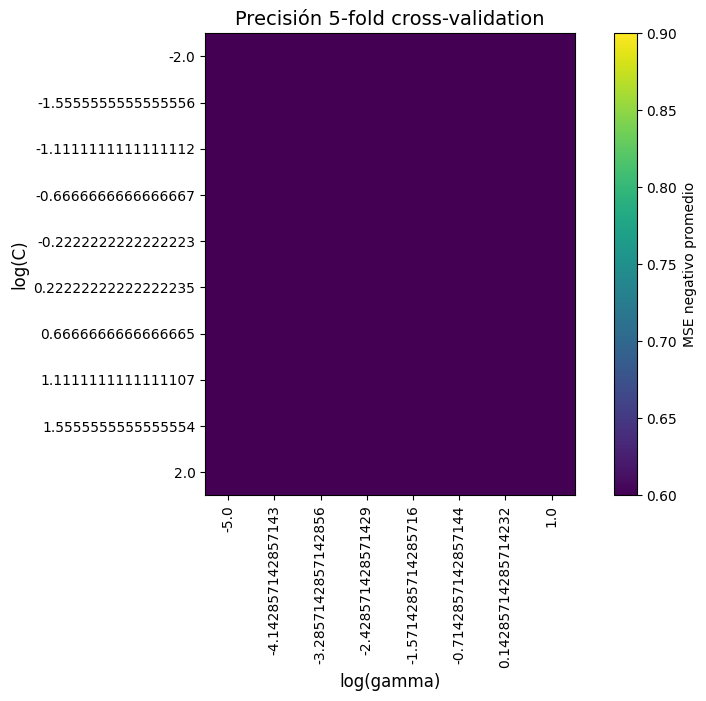

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Mostrar los mejores resultados de validación cruzada
print("Mejor score promedio en validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores parámetros: {}".format(grid.best_params_))

# Mostrar valores de gamma y C en escala logarítmica para la gráfica
print("Gamma en la gráfica: ", np.log10(grid.best_params_['gamma']))
print("C en la gráfica: ", np.log10(grid.best_params_['C']))

# Obtener los resultados de validación cruzada
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC), len(vectorG))

# Crear una figura y mostrar los resultados como una imagen
plt.figure(figsize=(10, 6))

# Mostrar la matriz de resultados
plt.imshow(scores, interpolation='nearest', vmin=0.6, vmax=0.9)

# Etiquetas de los ejes
plt.xlabel('log(gamma)', fontsize=12)
plt.ylabel('log(C)', fontsize=12)

# Añadir la barra de color
plt.colorbar(label='MSE negativo promedio')

# Establecer las posiciones de los ticks en los ejes x e y
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))

# Título de la gráfica
plt.title('Precisión 5-fold cross-validation', fontsize=14)

# Mostrar la gráfica
plt.show()


In [205]:
from sklearn.svm import SVR

# Obtener los mejores parámetros desde la búsqueda de grid
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

# Crear el modelo SVM con los mejores hiperparámetros
svmModel = SVR(kernel='rbf', gamma=Gopt, C=Copt)

# Entrenar el modelo con los datos de entrenamiento
svmModel.fit(X, y)

# Evaluar el modelo en el conjunto de datos de prueba (test_depurado)
r2_test = svmModel.score(test_depurado, y_test)

# Imprimir el resultado de la evaluación del modelo
print(f"R^2 (TEST): {r2_test:0.2f}")

# Opcional: si prefieres el error cuadrático medio, puedes usar:
# from sklearn.metrics import mean_squared_error
# y_pred = svmModel.predict(test_depurado)
# mse_test = mean_squared_error(y_test, y_pred)
# print(f"MSE (TEST): {mse_test:0.2f}")


R^2 (TEST): 0.42


Conclusión


El modelo de regresión permitió predecir el precio de los Airbnb en función de diversas variables. Después de dividir los datos en muestras de entrenamiento y prueba, se realizó un análisis exploratorio y una depuración de las variables. Las variables fueron transformadas y normalizadas cuando fue necesario, y se llevó a cabo una selección de variables para mejorar el rendimiento del modelo.

Durante la búsqueda del modelo óptimo, se probaron varias técnicas de regresión, incluyendo regresión lineal, Ridge, Random Forest y Gradient Boosting. Aunque algunos modelos mostraron un error cuadrático medio elevado, se realizaron ajustes, como la eliminación de algunas variables y la normalización de los datos, con el fin de mejorar los resultados y evitar el sobreajuste.

Las variables más significativas para la predicción del precio son el número de habitaciones, el tipo de habitación, el número de camas, la capacidad de alojamiento, los gastos de limpieza, las personas adicionales y la fianza. Se observó que los Airbnb más caros tienden a tener errores de predicción más altos, lo que llevó a realizar ajustes en los conjuntos de entrenamiento y prueba para limitar el impacto de los Airbnb muy caros.

El modelo final, después de varias iteraciones y ajustes, muestra una buena capacidad de predicción, manteniendo un compromiso razonable entre precisión y complejidad.
